![example](images/FoxStudio.webp)

# Microsoft studio needs movie analysis

**Authors:** Yeonjae Zhang, Caleb
***

## Overview

This analysis is made for suggesting mircosoft studio the goals and business directions. With numbers and vote data, I will figure out which movies were successful and recommand business directions from historical data.

## Business Problem
Microsoft is willing to create original video content and they want to do successful business.
1. Find partner studio
2. Budget recommendation
3. Find high gross genres


## Data Understanding

Box Office Mojo has the longest running dataset of movie gross for money from the popular movies in world-wide. And IMDB has the largest dataset of the popularity. The numbers has a lot of data like numbers. The data files will provide title, domestic gross, foreign gross, genre, and budget.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
budget_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
title_df = pd.read_csv('data/zippedData/imdb.title.basics.csv')

In [3]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### Budget Data
Budget data includes movie and production_budget.

In [6]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Gross Data
Gross data includes title, domestic gross, and foreign gross.

In [7]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
gross_df['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

### Title Data
Title data includes title, and genres.

In [9]:
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Data Preparation

For the gross data and title data, I will drop unneccesary columns.


### Data Cleaning

#### Budget Data

In [10]:
# Drop unneccesary columns
budget_df = budget_df.drop(['id', 'release_date', 'domestic_gross', 'worldwide_gross'], axis = 1)

In [11]:
# Make production_budget to int
budget_df['production_budget'] = budget_df['production_budget'].replace({',' : '', '\$' : ''}, regex = True).astype('int')

#### Gross Data

In [12]:
# Drop unneccesary columns
gross_df = gross_df.drop(['year'
                ], axis = 1)

In [13]:
# Make rows have NaN dropped
gross_df.dropna(subset = ['domestic_gross', 'foreign_gross'], inplace = True)

# Make foreign_gross to float
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',', '').astype('float')


#### Title Data

In [14]:
# Drop unneccesary columns
title_df.drop(['tconst', 'primary_title', 'start_year', 
              'runtime_minutes'], axis = 1, inplace = True)

### Merging data
I will merge gross data and title data using title.

In [15]:
gross_title_df = gross_df.merge(title_df, left_on = 'title', 
                                right_on = 'original_title'
                               ).drop(columns = 'original_title')
final_df = gross_title_df.merge(budget_df, left_on = 'title', right_on = 'movie').drop(columns = 'movie')
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 0 to 1313
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1314 non-null   object 
 1   studio             1314 non-null   object 
 2   domestic_gross     1314 non-null   float64
 3   foreign_gross      1314 non-null   float64
 4   genres             1293 non-null   object 
 5   production_budget  1314 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 71.9+ KB


### Feature Engineering
I create total gross columns and drop domestic_gross and foreign_gross.

In [16]:
# Create total gross columns
final_df['total gross (mil)'] = (final_df['domestic_gross'
                                              ] + final_df['foreign_gross']
                                           ) / 1000000

# Create production_budget (mil)
final_df['production_budget (mil)'] = final_df['production_budget'] / 1000000

# Create ROI columns
final_df['ROI'] = final_df['total gross (mil)'] / final_df['production_budget (mil)']

# Drop NaN valuse on genres and unneccesary columns
final_df.dropna(subset = ['genres'], inplace = True)
final_df.drop(['domestic_gross', 'foreign_gross', 'production_budget'], axis = 1, inplace = True)

final_df.head(10)


,title,studio,genres,total gross (mil),production_budget (mil),ROI
0,Toy Story 3,BV,"Adventure,Animation,Comedy",1067.0,200.0,5.335000
1,Inception,WB,"Action,Adventure,Sci-Fi",828.3,160.0,5.176875
2,Shrek Forever After,P/DW,"Adventure,Animation,Comedy",752.6,165.0,4.561212
3,The Twilight Saga: Eclipse,Sum.,"Adventure,Drama,Fantasy",698.5,68.0,10.272059
4,Iron Man 2,Par.,"Action,Adventure,Sci-Fi",623.9,170.0,3.670000
5,Tangled,BV,"Adventure,Animation,Comedy",591.8,260.0,2.276154
6,Despicable Me,Uni.,"Animation,Comedy,Family",543.1,69.0,7.871014
7,How to Train Your Dragon,P/DW,"Action,Adventure,Animation",494.9,165.0,2.999394
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,"Adventure,Family,Fantasy",415.7,155.0,2.681935
9,The Karate Kid,Sony,"Action,Drama,Family",359.1,40.0,8.977500


## Analysis

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

### High ROI studios
Figure out what studios return on investment efficiently

<AxesSubplot:title={'center':'High ROI'}, xlabel='studio', ylabel='ROI'>

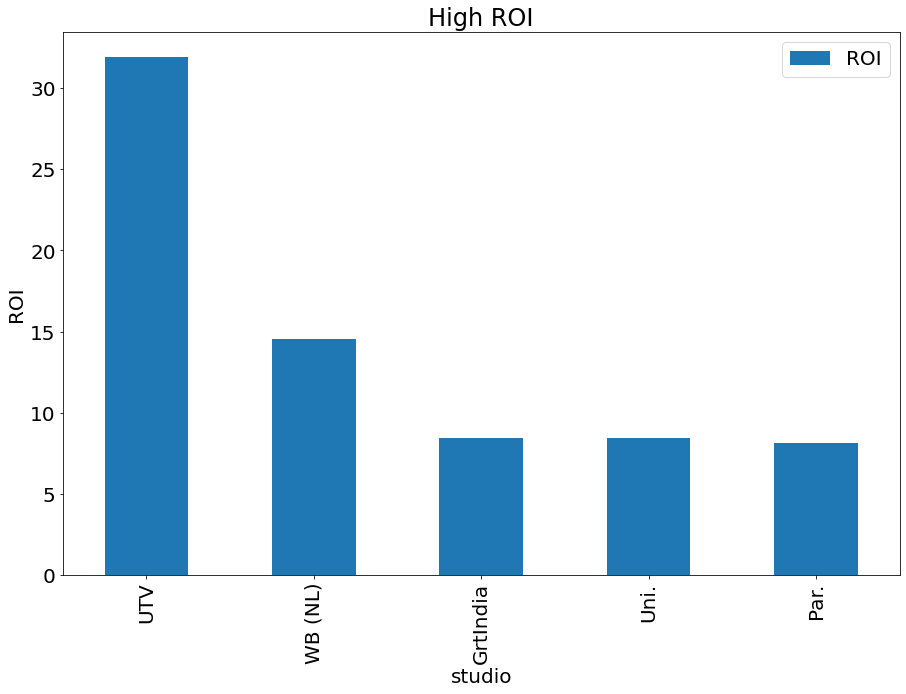

In [23]:
# Group by to aggregate
ROI_df = final_df.groupby('studio'
                        ).mean().sort_values('ROI', ascending = False
                                            ).head(10)
# Drop low gross studio
ROI_df = ROI_df.loc[ROI_df['total gross (mil)'] > 100]

# Create bar
plt.rc('font', size = 20)
ROI_df.loc[:, ['ROI']].plot(kind = 'bar', figsize = (15,10), title = 'High ROI', ylabel = 'ROI', fontsize = 20)

### Budgets from hight ROI studios
Figure out the budgets from selected studios.

<AxesSubplot:title={'center':'Budget'}, xlabel='studio', ylabel='Budget (mil)'>

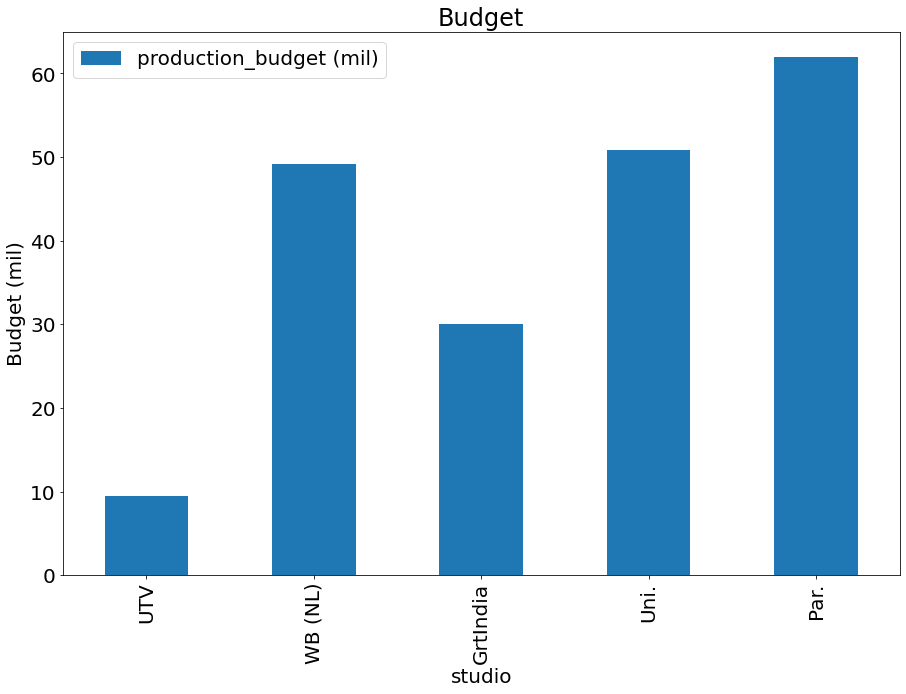

In [22]:
# Create bar
ROI_df.loc[:, ['production_budget (mil)']].plot(kind = 'bar', figsize = (15,10), title = 'Budget', ylabel = 'Budget (mil)')


### Mean of total gross by genres
Figure out what genres make more money

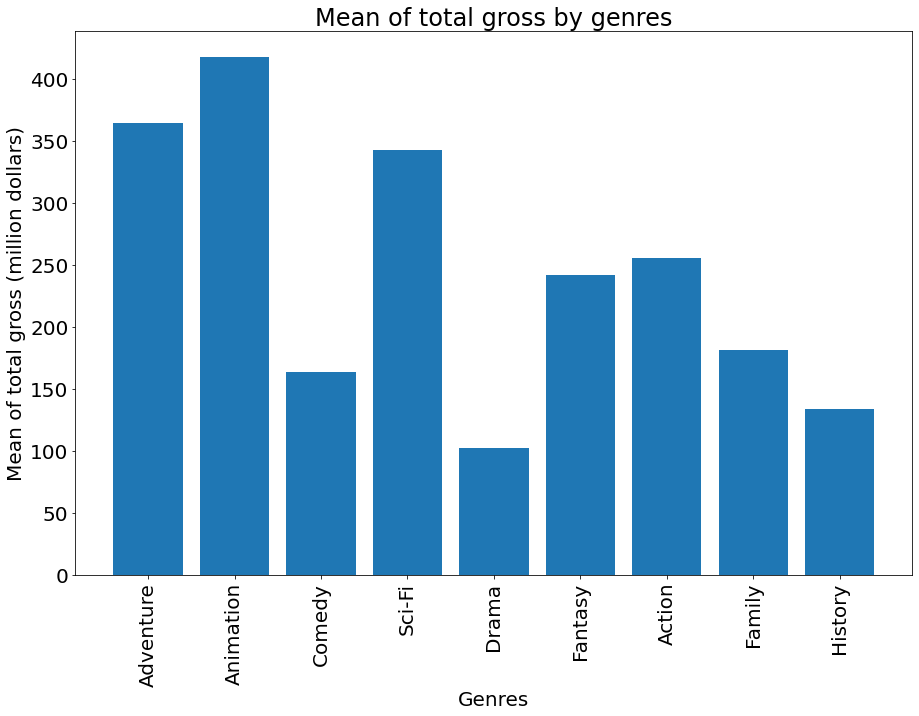

In [20]:
# Create function to get mean of genres
def get_mean(genres):
    mean = final_df.loc[final_df['genres'
                                ].str.contains(genres
                                                )]['total gross (mil)'
                                                    ].mean()
    return mean

mean_list = {}
# Mean of Adventure
mean_list.update({'Adventure' : get_mean('Adventure')})
# Mean of Animation
mean_list.update({'Animation' : get_mean('Animation')})
# Mean of Comedy
mean_list.update({'Comedy' : get_mean('Comedy')})
# Mean of Sci-Fi
mean_list.update({'Sci-Fi' : get_mean('Sci-Fi')})
# Mean of Drama
mean_list.update({'Drama' : get_mean('Drama')})
# Mean of Fantasy
mean_list.update({'Fantasy' : get_mean('Fantasy')})
# Mean of Action
mean_list.update({'Action' : get_mean('Action')})
# Mean of Family
mean_list.update({'Family' : get_mean('Family')})
# Mean of History
mean_list.update({'History' : get_mean('History')})

fig, ax = plt.subplots(figsize = (15,10))
ax.bar(x = list(mean_list.keys()), height = list(mean_list.values()))
ax.set_title('Mean of total gross by genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Mean of total gross (million dollars)')
plt.xticks(rotation = 90)

plt.show()


## Conclusions
This analysis leads to three recommendations for movie studio business:

* **This analysis suggests that microsoft studio make a movie with partnership** There are Top 5 studios that made money more than 100 mil each movies. Introduce 5 studios [UTV, WB, Gitindia, Uni., Par.]
* **This analysis suggests budgets with the introduced partner studios.**  UTV : 10 mil, WB : 50 mil, Gitindia : 30 mil, Uni. : 50 mil, Par. : 60 mil
* **Recommend successful movie genre combination.** This analysis shows the 3 genres that made money the best. I recommend the combination of Animation, Adventure and Sci-Fi. This combination will lead microsoft studio to success.
